In [1]:
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from matplotlib import pyplot

Using TensorFlow backend.


In [2]:
# generate regression dataset
X, Y = make_regression(n_samples=1000, n_features=20,
                      noise=0.1, random_state=1)
# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainY, testY = Y[:n_train], Y[n_train:]

In [3]:
# reshape 1d arrays to 2d arrays
trainY = trainY.reshape(len(trainY), 1)
testY = testY.reshape(len(testY), 1)

In [4]:
trainY[0]

array([283.43826532])

In [5]:
# created scaler
scaler = StandardScaler()
# fit scaler on training dataset
scaler.fit(trainY)
# transform training dataset
trainY = scaler.transform(trainY)

In [6]:
trainY[0]

array([1.98960285])

In [7]:
# transform test dataset
testY = scaler.transform(testY)

In [8]:
testY[0]

array([0.34325985])

In [9]:
# define model
model = Sequential()
model.add(Dense(25, input_dim=20, activation='relu',
               kernel_initializer='he_uniform'))
model.add(Dense(1, activation='linear'))

W1217 19:38:53.074023 16368 deprecation_wrapper.py:119] From C:\Users\Lenovo\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1217 19:38:53.095949 16368 deprecation_wrapper.py:119] From C:\Users\Lenovo\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:529: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1217 19:38:53.098941 16368 deprecation_wrapper.py:119] From C:\Users\Lenovo\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4420: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [10]:
# complie model
model.compile(loss='mean_squared_error', optimizer=SGD(lr=0.01, momentum=0.9))
# fit model
history = model.fit(trainX, trainY, validation_data=(testX, testY),
                   epochs=100, verbose=0)

W1217 19:38:53.166760 16368 deprecation_wrapper.py:119] From C:\Users\Lenovo\Anaconda3\lib\site-packages\keras\optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W1217 19:38:53.285443 16368 deprecation_wrapper.py:119] From C:\Users\Lenovo\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:1021: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W1217 19:38:53.308891 16368 deprecation_wrapper.py:119] From C:\Users\Lenovo\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:1008: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



In [11]:
# evaluate the model
train_mse = model.evaluate(trainX, trainY, verbose=0)
test_mse = model.evaluate(testX, testY, verbose=0)

In [12]:
train_mse

0.0023457184098660947

In [13]:
test_mse

0.00778471889346838

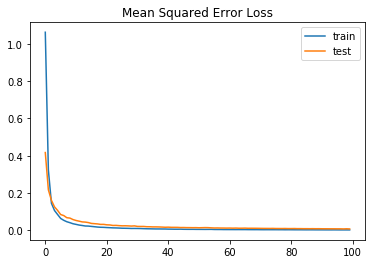

In [14]:
# plot loss during training
pyplot.title('Mean Squared Error Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()